In [1]:
# Mounting to Google Colab drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
# Seting the directory of the datasets as the current
%cd '/gdrive/MyDrive/ML_Group_Project'

/gdrive/MyDrive/ML_Group_Project


In [3]:
# Importing necessary library libraries
import pandas as pd
import numpy as np
import missingno as msno

In [4]:
# Loading the training and data from 'train.csv'
train = pd.read_csv('train.csv')

In [5]:
# Loading the testing data from 'test.csv'
test=pd.read_csv('test.csv')

In [6]:
# Displaying the first 5 row of training dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Displaying the first 5 row of testing dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# A brief overview of the training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Exploratory Data Analysis**

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


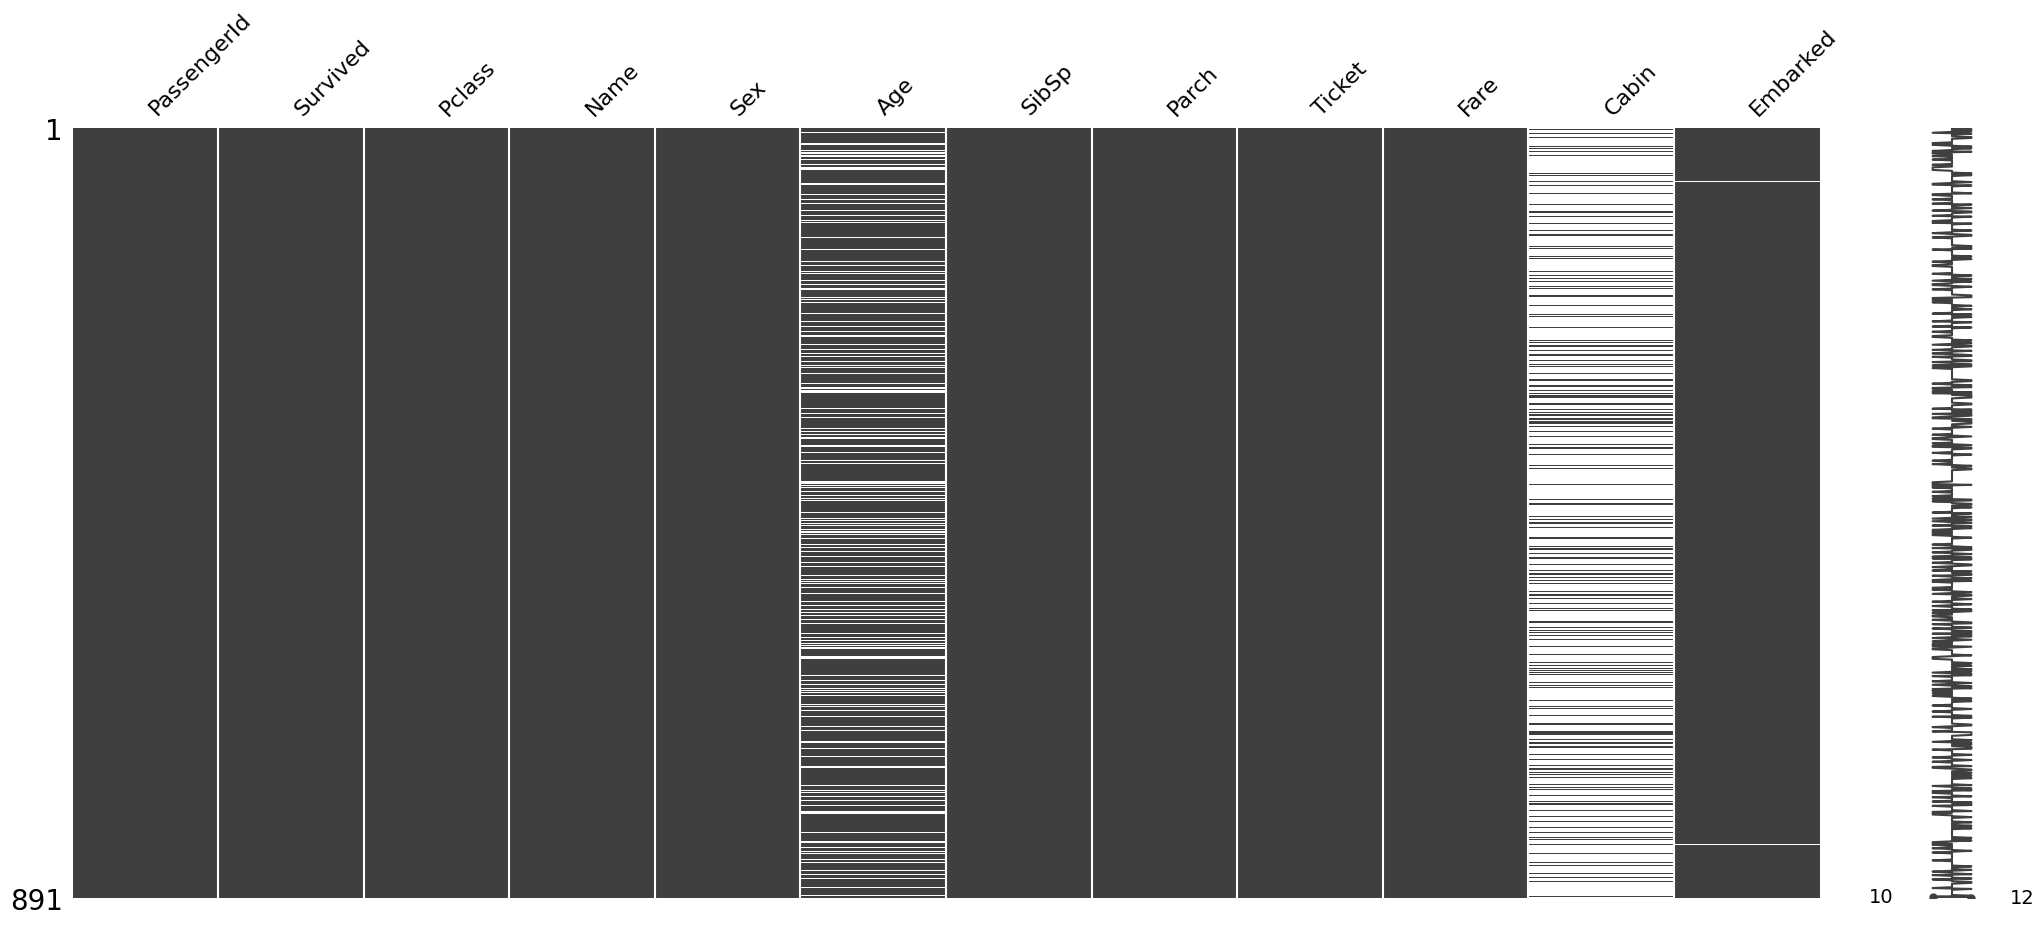

In [10]:
msno.matrix(train)
train.isnull().sum()

# Explanation:
Here, we can clearly observe that the Cabin and Age columns have a significant number of missing values. However, the Embarked column has only two missing values, which is manageable, can be imputed with the most frequent value.

The Age column, despite having 177 missing values, is a very important factor. Therefore, we will retain this column and handle the missing values by replacing them with either the mean or the median.

On the other hand, the Cabin column has 897 missing values, accounting for approximately 77% of the data. Since the majority of values are missing, it is not practical or meaningful to fill these missing values. Thus, we will not attempt to impute the missing values in this column or create a new binary attribute indicating whether a passenger has a cabin number (i.e., missing or not). This can serve as an indirect indicator of passenger class or comfort.


At the moment there is great doubt that it will be useful to use "Ticket"

To start with, we can check the number of unique values to see how diverse this column is.

In [11]:
unique_tickets = train['Ticket'].nunique()
print(f"Number of unique values in Ticket: {unique_tickets}")

Number of unique values in Ticket: 681


# Explanation:
Since most ticket values are unique, the "Ticket" column might not directly contribute to predicting survival. However, some tickets are repeated, which might represent passengers traveling together (e.g., families or groups). We could potentially create a feature that indicates if a passenger's ticket is shared (i.e., a group of passengers with the same ticket number). This could provide additional insights into group survival behavior.

In [12]:
duplicate_tickets = train['Ticket'].value_counts()
print(f"Number of tickets occurring more than once:\n{duplicate_tickets[duplicate_tickets > 1]}")

Number of tickets occurring more than once:
Ticket
347082             7
CA. 2343           7
1601               7
3101295            6
CA 2144            6
                  ..
248738             2
12749              2
19996              2
S.C./PARIS 2079    2
349237             2
Name: count, Length: 134, dtype: int64


In [13]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

#Explanation:
To gain more insight into the relationships between passengers traveling together, we create a new feature, FamilySize, which sums the number of siblings/spouses (SibSp) and parents/children (Parch) and includes the passenger themselves (+1).



In [14]:
ticket_family_size_check = train.groupby('Ticket')['FamilySize'].unique()
print(f"Family size: {ticket_family_size_check}")

Family size: Ticket
110152         [1]
110413         [3]
110465         [1]
110564         [1]
110813         [2]
              ... 
W./C. 6608     [5]
W./C. 6609     [1]
W.E.P. 5734    [2]
W/C 14208      [1]
WE/P 5735      [3]
Name: FamilySize, Length: 681, dtype: object


In [15]:

same_family_size = ticket_family_size_check[ticket_family_size_check.apply(lambda x: len(x) == 1)]
varied_family_size = ticket_family_size_check[ticket_family_size_check.apply(lambda x: len(x) > 1)]

print(f"Tickets with the same FamilySize: {len(same_family_size)}")
print(f"Tickets with varying FamilySize: {len(varied_family_size)}")

total_tickets = len(ticket_family_size_check)
same_percentage = len(same_family_size) / total_tickets * 100
varied_percentage = len(varied_family_size) / total_tickets * 100

print(f"Percentage (the same FamilySize): {same_percentage:.2f}%")
print(f"Percentage (the same FamilySize): {varied_percentage:.2f}%")

Tickets with the same FamilySize: 654
Tickets with varying FamilySize: 27
Percentage (the same FamilySize): 96.04%
Percentage (the same FamilySize): 3.96%


#Explanation:
The vast majority of tickets with a consistent FamilySize suggest that these passengers are likely traveling in groups, such as families. This could be crucial for predicting survival, as groups might behave similarly in survival situations.
However, the information extracted from the ticket may duplicate the information we can derive from Family Size.
To find out, we calculate the correlation between family size and ticket prefix using Cramer's V method (since Ticket Prefix is categorical)


In [16]:
from scipy.stats import chi2_contingency
import numpy as np

# Create a contingency table
train['TicketPrefix'] = train['Ticket'].str.extract(r'([A-Za-z]+)', expand=False)
contingency_table = pd.crosstab(train['FamilySize'], train['TicketPrefix'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))
print("Cramér's V:", cramers_v)


Cramér's V: 0.5428329777140404


#Explanation:
Since Cramer's V is 0.5428, this means that there is a moderate relationship between Family Size and Ticket Prefix traits. This suggests that Ticket Prefix may be somewhat redundant with Family Size in terms of predicting survival, as both traits appear to carry related information.

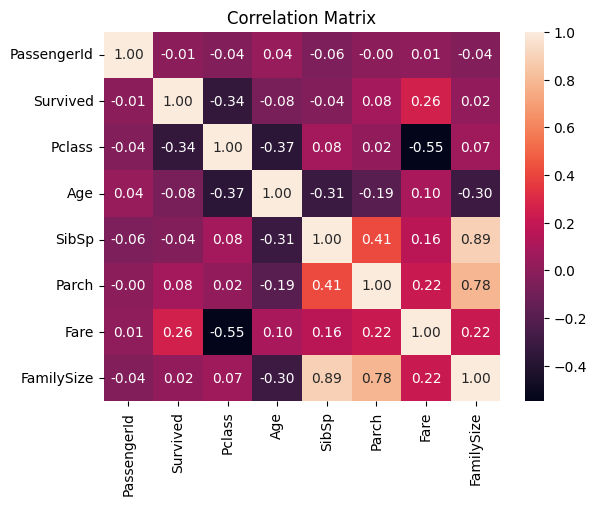

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_data = train.select_dtypes(include=[np.number])

correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Explanation:
Using a correlation matrix allows us to identify potential relationships between numerical features in the dataset. When we visualize the correlation matrix, we observe:

  - Weak correlation with Age: There is no strong correlation between Age and features like PassengerId, Survived, and Fare. However, Parch and SibSp show a moderate correlation with Age, which suggests that passengers with a higher number of family members aboard are somewhat correlated with age.
  - Strong relationship between Pclass and Survived: As expected, Pclass has a high correlation with Survived, reflecting the clear stratification of survival chances based on class.
  - Negative correlation between Fare and Pclass: The negative correlation between Fare and Pclass is expected as passengers in higher classes (1st class) typically pay more for their tickets.

  Given the correlation of Age with Pclass and SibSp, a more sophisticated imputation method for missing Age would involve using Pclass and SibSp as predictors, rather than relying on simple mean or median imputation. This method will likely provide a more accurate estimation of missing values.

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def plot_survival_by_category(catVariable, targetCatVariable):
    """
    Plots absolute, relative, and distribution frequencies by a categorical variable.
    """
    # Absolute count
    absCount = pd.crosstab(catVariable, targetCatVariable).rename(columns={0: "Victims", 1: "Survivors"})

    # Relative count (percentage)
    relCount = pd.crosstab(catVariable, targetCatVariable, normalize="index") * 100
    relCount = relCount.round(1).rename(columns={0: "Victims", 1: "Survivors"})

    # Create subplots for the bar charts
    fig = make_subplots(
        rows=3, cols=1,  # Changed to 3 rows for the additional plot
        vertical_spacing=0.3,
        subplot_titles=(
            f"Absolute Count by {catVariable.name}",
            f"Relative Percentage by {catVariable.name}",
            f"Distribution of {catVariable.name}"
        )
    )

    # Add bar chart for absolute counts
    for col in absCount.columns:
        fig.add_trace(go.Bar(x=absCount.index, y=absCount[col], name=f"{col} (Abs)"), row=1, col=1)

    # Add bar chart for relative counts
    for col in relCount.columns:
        fig.add_trace(go.Bar(x=relCount.index, y=relCount[col], name=f"{col} (Rel)"), row=2, col=1)

    categories_order = absCount.index
    # Add bar chart for the distribution of catVariable
    cat_counts = catVariable.value_counts().reindex(categories_order)
    fig.add_trace(go.Bar(x=cat_counts.index, y=cat_counts.values, name=catVariable.name), row=3, col=1)

    # Layout update
    fig.update_layout(
        height=900, width=1000,  # Increased height for 3 plots
        barmode="group", title=f"Survival Analysis by {catVariable.name}"
    )
    fig.update_yaxes(title_text="Count", row=1, col=1)
    fig.update_yaxes(title_text="Percentage", row=2, col=1)
    fig.update_yaxes(title_text="Count", row=3, col=1)

    # Show the plot
    fig.show()

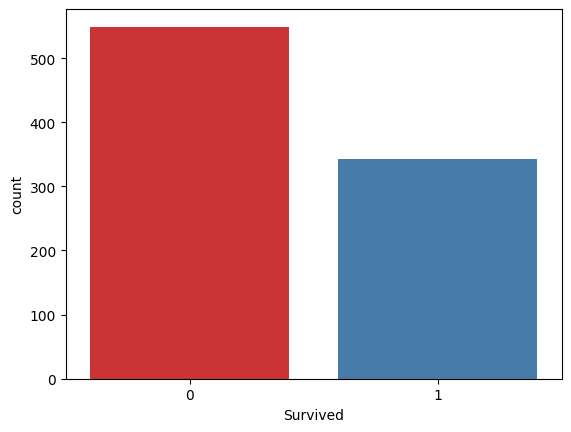

,proportion
Survived,
0,0.616162
1,0.383838


In [19]:
sns.countplot(x='Survived', data=train, hue='Survived', palette='Set1', legend=False)
plt.show()
train.Survived.value_counts(normalize=True)

# Explanation:
Here, we can observe the distribution of survival and non-survival. It is evident that only 38% of the passengers survived, whereas the majority, 61%, did not survive the disaster. Based on this observation, we can conclude that the dataset is slightly imbalanced.


In [20]:
plot_survival_by_category(train['Pclass'], train['Survived'])

# Explanation:
From the plot, we can see that more than 50% of the passengers were traveling in 3rd class. The average survival rate shows a clear trend: survival likelihood increases with passenger class. Passengers in 1st class had the highest survival rate at 62%, followed by 2nd class at 47%, and 3rd class at 24%.This strongly emphasizes that the class of travel was a key determinant of survival chances.


In [21]:
plot_survival_by_category(train['Sex'], train['Survived'])

# Explanation:
Here, we can see that the number of males was significantly higher compared to females. However, the survival rate for females (74%) was much higher than that for males (19%), indicating that a larger proportion of males did not survive.

While gender is an important attribute, coding it directly may introduce bias. To mitigate this problem, next consider creating a new attribute, such as Title (extracted from the passenger's name), to reflect potential gender or societal differences without introducing direct bias.

In [22]:
plot_survival_by_category(train['SibSp'], train['Survived'])

# Explanation:
Here we can see, a significant portion of the passengers who survived had no siblings or spouse, followed by those with one sibling or spouse. In terms of survival percentage, passengers with one sibling or spouse had a survival rate of over 53.5%, while those with two siblings or spouse had a survival rate of more than 46.4%.

Passengers with 5 or more siblings or spouses had lower survival rates, likely due to overcrowding or logistical difficulties.


<Axes: title={'center': 'Survival Rate by Family Size'}, xlabel='FamilySize'>

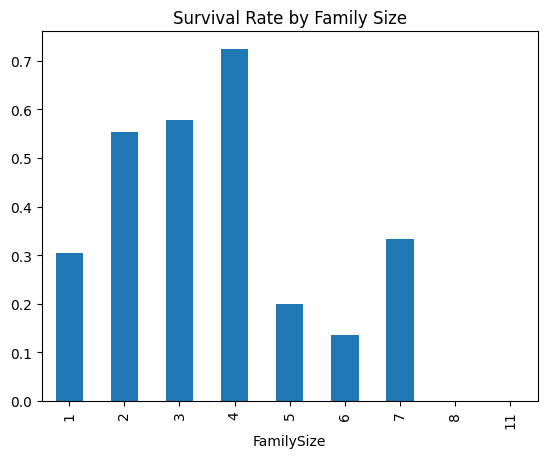

In [23]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.groupby('FamilySize')['Survived'].mean().plot(kind='bar', title='Survival Rate by Family Size')


#Explanation:
FamilySize characterisation from SibSp and Parch data shows that passengers in moderate-sized families (2-4 members) had higher survival rates. In contrast, passengers travelling alone or in large families had low survival rates.

In [24]:
plot_survival_by_category(train['Parch'], train['Survived'])

# Explanation:
From the plot, we can see that passengers with small family groups (Parch = 1–3) had higher survival rates (50–60%), while those traveling alone (Parch = 0) had a lower survival rate (34.4%). Larger families (Parch = 4–6) had the worst outcomes, with survival rates dropping to 0–20%. By combining Parch and SibSp (siblings and spouses aboard), a "FamilySize" feature can be derived, which tends to correlate with survival.


It is useful to create a derived feature such as FamilySize (sum of SibSp and Parch), as it seems to provide a better indication of survival chances than SibSp alone.

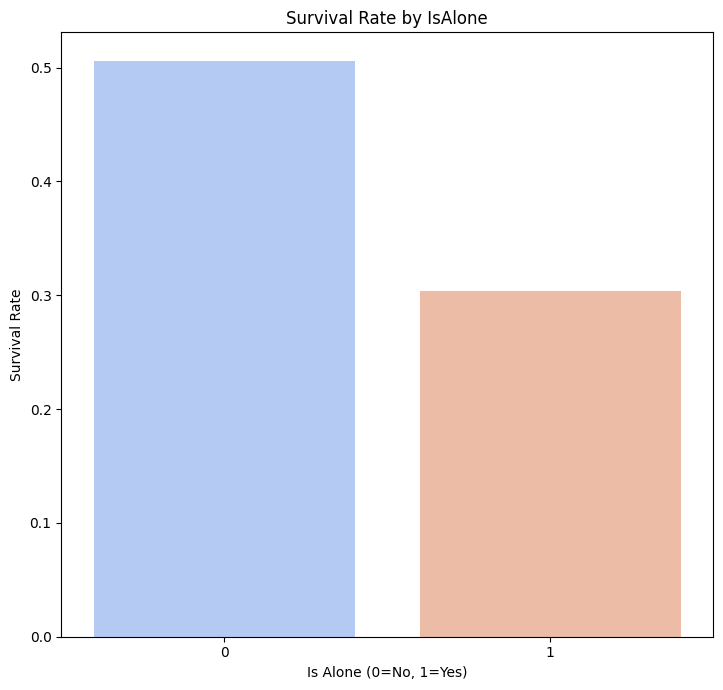

In [25]:
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

plt.figure(figsize=(14, 7))

# Plot for IsAlone
plt.subplot(1, 2, 2)
sns.barplot(x='IsAlone', y='Survived', data=train, errorbar=None, palette='coolwarm', hue='IsAlone', legend=False)
plt.title('Survival Rate by IsAlone')
plt.xlabel('Is Alone (0=No, 1=Yes)')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

#Explanation:
The IsAlone attribute for passengers travelling alone (FamilySize == 1) may be useful in the future. This attribute will allow a clear distinction to be made between passengers who had family support and those who did not, which may be critical in survival prediction models.

In [26]:
plot_survival_by_category(train['Embarked'], train['Survived'])

# Explanation:
We can see that the majority of passengers embarked from S, but only 33% of them survived the sinking of the Titanic. In contrast, the highest survival rate of 55% was observed among passengers who embarked from C, indicating a notable difference in survival outcomes based on the port of embarkation.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(dataset, feature, title, bins=30, hist=True, fsize=(5, 5)):

  fig, ax = plt.subplots(figsize=fsize)
  ax.set_title(title)

  if hist:  # Use distplot if hist is True
    sns.histplot(dataset[feature], color='g', bins=bins, kde=True, ax=ax)
  else:  # Use histplot if hist is False
    sns.histplot(dataset[feature], color='g', bins=bins, ax=ax)

def plot_kernel_density_estimate_survivors(dataset, feature, title, fsize=(5, 5)):

  fig, ax = plt.subplots(figsize=fsize)
  ax.set_title(title)

  sns.kdeplot(dataset[feature][dataset["Survived"] == 1],
              fill=True, ax=ax, label='Survived')
  sns.kdeplot(dataset[feature][dataset["Survived"] == 0],
              fill=True, ax=ax, label="Died")

  ax.set_xlabel(feature)
  ax.legend()

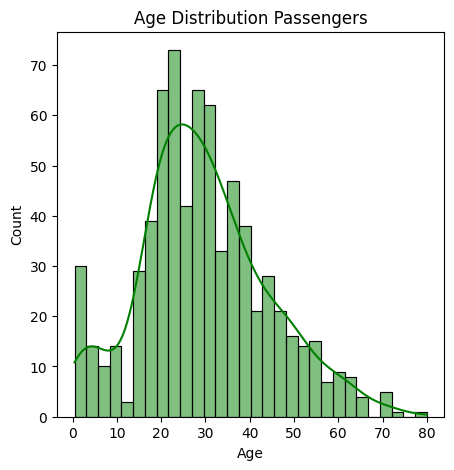

In [28]:
plot_distribution(train, "Age", "Age Distribution Passengers")

# Explanation:

 The histogram shows that age is relatively normally distributed, with a slight skew towards younger passengers.

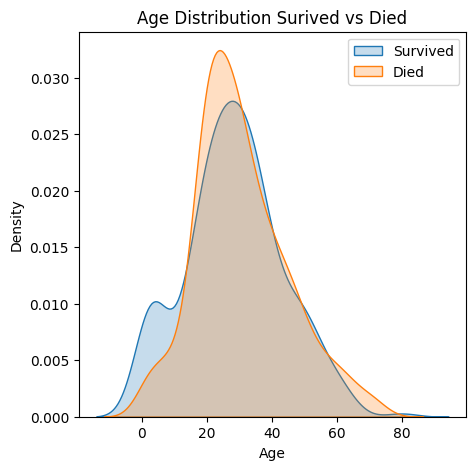

In [29]:
plot_kernel_density_estimate_survivors(train, "Age", "Age Distribution Surived vs Died")

# Explanation:
We see a marked difference in survival rates between age groups. The survival rate of very young passengers (especially infants) is slightly higher.
Children (especially under about 15 years of age) are more likely to survive, and the survival rate of very young passengers ( infants) is even higher. At the same time, the survival rate of adults drops quite sharply. A more detailed study could combine age with gender or other variables, such as class, as they may provide more insight.

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_swarm_survivors(dataset, feature1, feature2, title, fsize=(18, 5)):

    fig, ax = plt.subplots(figsize=fsize)
    ax.grid(True)

    sns.swarmplot(y=feature1, x=feature2, hue='Survived', data=dataset, ax=ax)
    ax.set_title(title)
    plt.show()

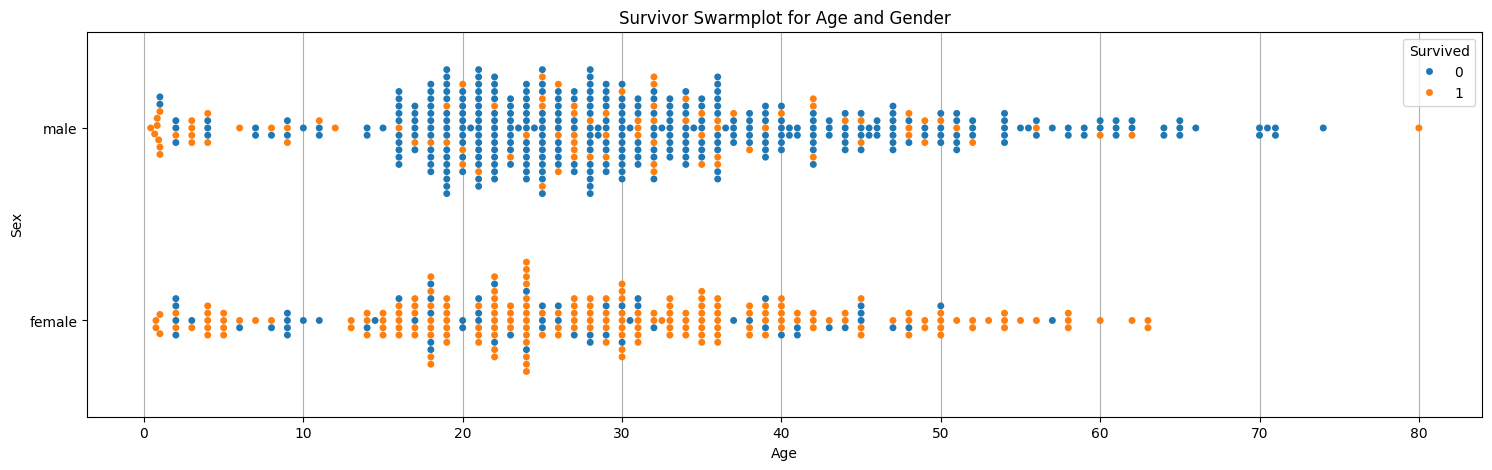

In [31]:
plot_swarm_survivors(train, "Sex", "Age", "Survivor Swarmplot for Age and Gender")

# Explanation:
Looking at the results, it is clear that age provides valuable information. The swarm plot above shows that a significant portion of male survivors were passengers between the ages of 0 and 12. While a significant portion of male survivors were children, women, particularly those aged 20–40, exhibited much higher survival rates. For men, the likelihood of survival decreased with age, especially in older age groups.  

This suggests that age played a crucial role in the survival chances.

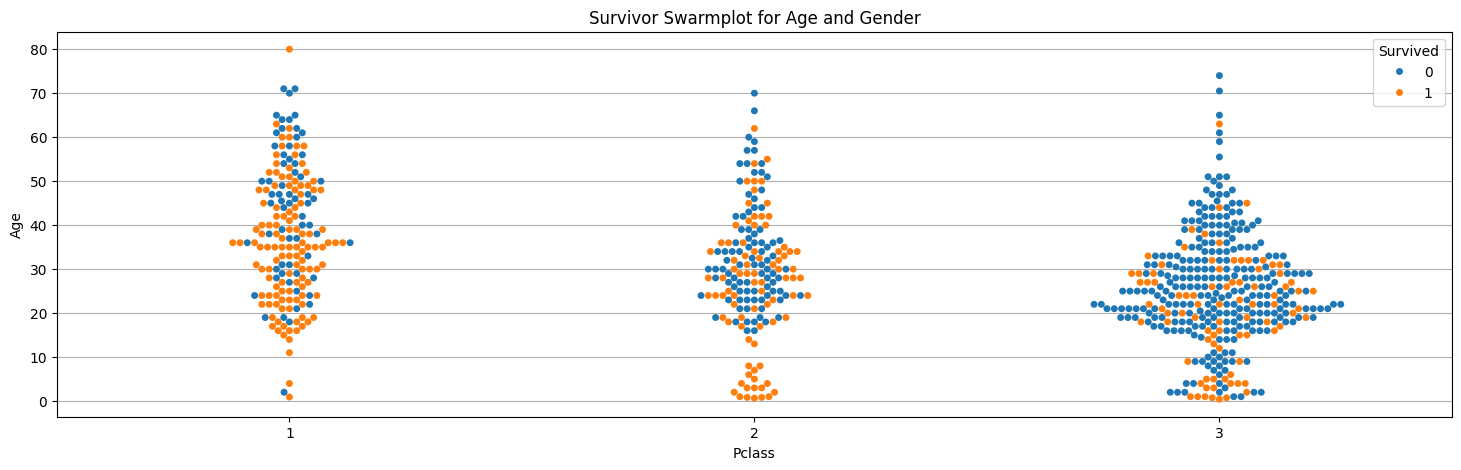

In [32]:
plot_swarm_survivors(train, "Age", "Pclass", "Survivor Swarmplot for Age and Gender")

# Explanation:
A strong correlation between class and survival emerges, with first-class passengers having significantly higher survival rates compared to third-class passengers. However, the plot also highlights that first-class had fewer children, which may have skewed overall survival rates. The survival rate for adults in first class was significantly higher than for those in lower classes, underscoring the importance of class in survival predictions.

<Axes: title={'center': 'Distribution of Titles'}, xlabel='Title'>

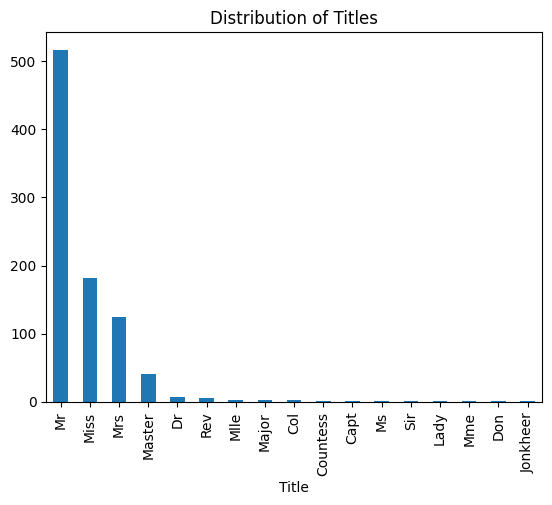

In [34]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'].value_counts().plot(kind='bar', title='Distribution of Titles')


# Explanation:
We created a new feature, "Title", extracted from the passenger's name (e.g., Mr., Mrs., Miss.), to investigate its relationship with survival.

 The distribution of titles reveals that common titles like "Mr.", "Miss.", and "Mrs." appear frequently, while rarer titles like "Dr." or "Rev." are less common. These rare titles were grouped into a "Rare" category to simplify the analysis.

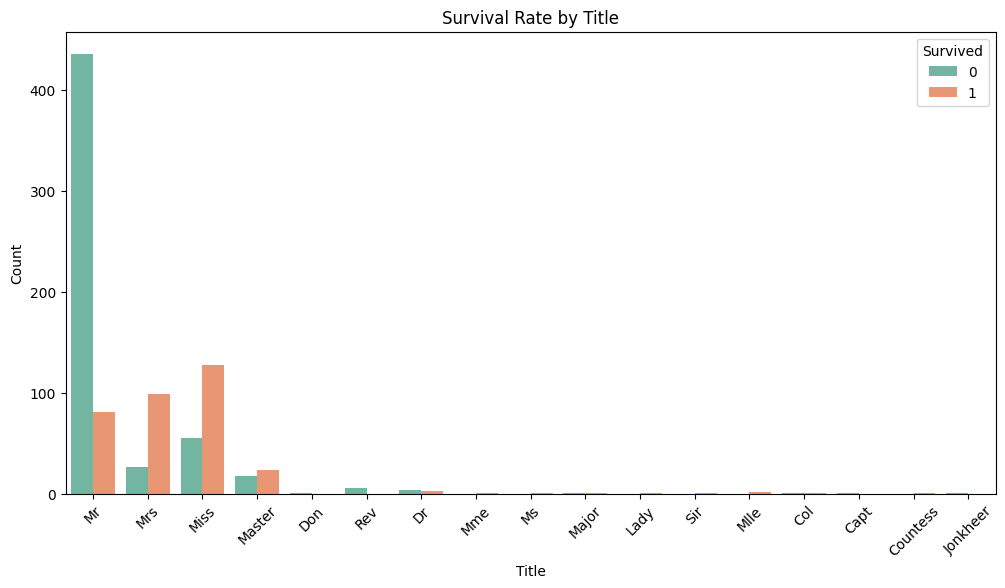

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Title', hue='Survived', data=train, palette='Set2')
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Explanation:
The analysis indicates that titles correlate with survival outcomes.
       
  -  Mr.: Males with this title generally had a lower survival rate, which is consistent with the historical focus on saving women and children.
  -   Miss.: Female passengers with this title had a higher chance of survival, which aligns with the prioritization of women and children during the evacuation.
  -   Mrs.: Married women or widows had a higher survival rate compared to men, though not as high as women labeled as "Miss."
  - Master.: Children with this title had the highest survival rates, likely due to their prioritization during the evacuation.
  - Rare Titles (e.g., Dr., Rev.): Individuals with rarer titles, such as those from the aristocracy or clergy, often had a higher chance of survival, which may be attributed to their perceived social status.

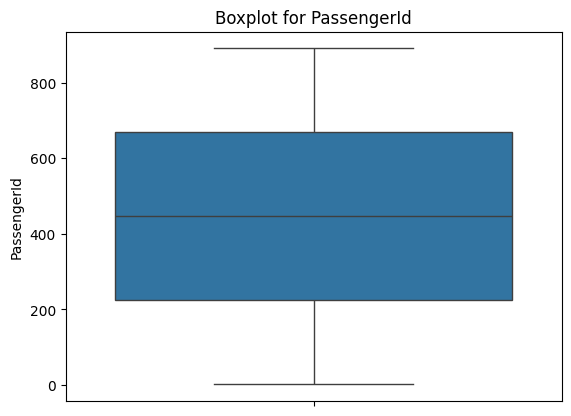

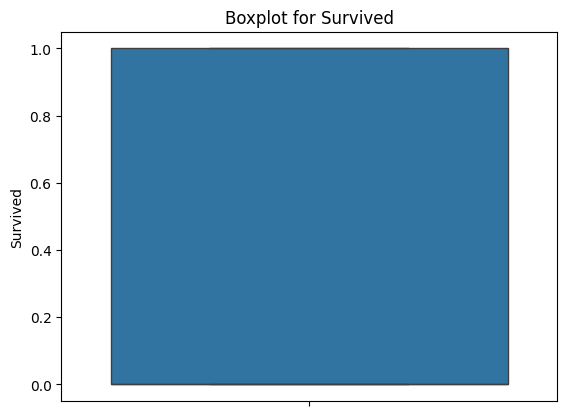

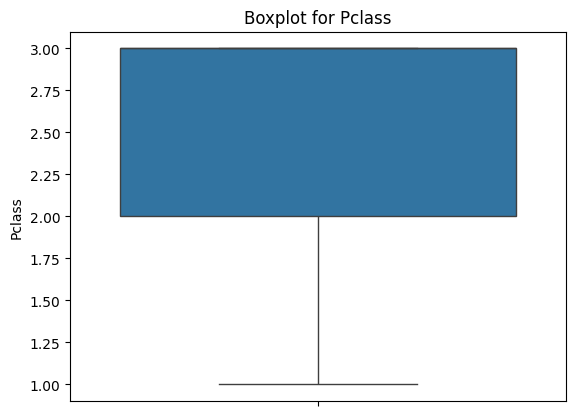

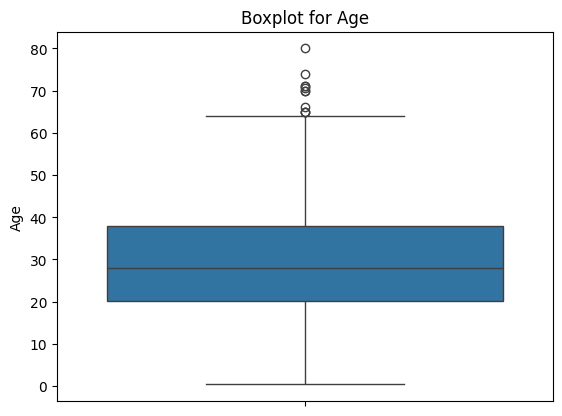

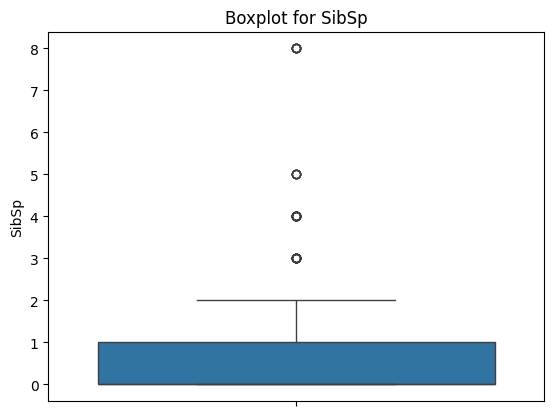

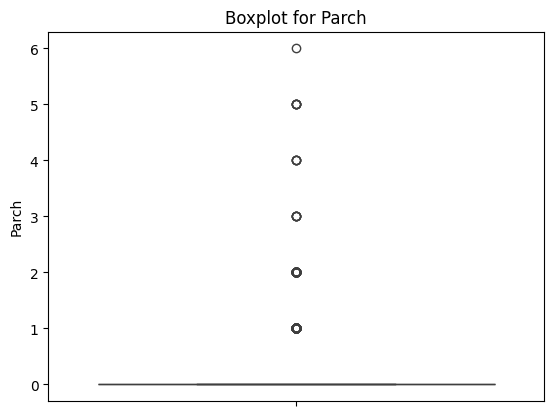

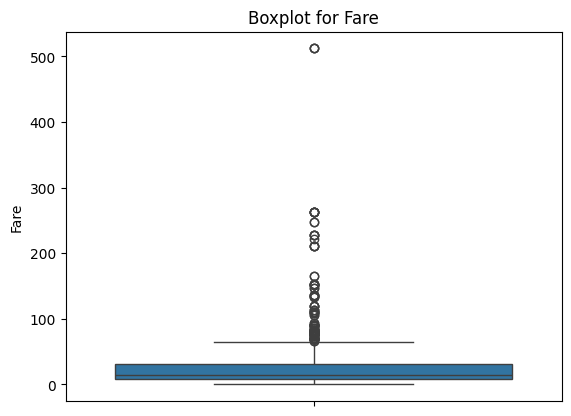

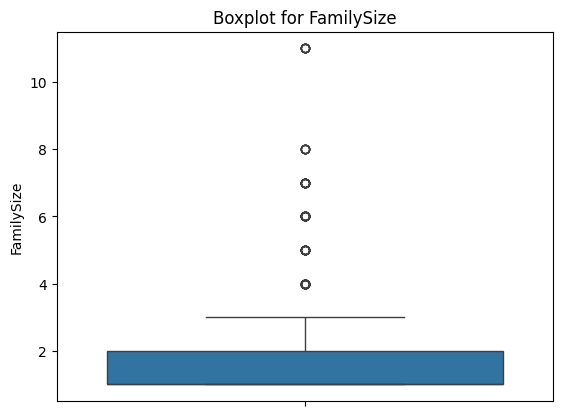

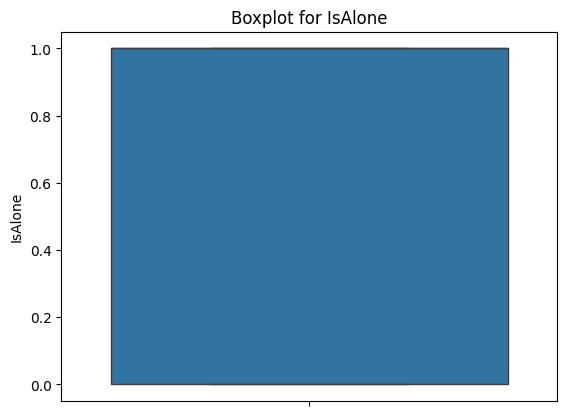

In [36]:
#Added - to analize numerical
# Анализ выбросов (outliers)
numerical_columns = train.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    sns.boxplot(data=train[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Explanation:
Check the data for outliers
From the resulting boxplots we can see:
- Fare:The boxplot clearly shows the presence of large outliers in the Fare column.These extreme values represent passengers who paid much more than the majority, which can skew the model training results if not addressed. These outliers may correspond to passengers in luxury first class cabins.
- Age:The Age column shows a more even distribution with fewer extremes, although there are a few ages at the lower and upper ends of the spectrum that may need attention.
-  SibSp and Parch:These columns also show some outliers, especially for passengers with a large number of siblings/spouses or parents/children on board. Although these values are not as extreme as in the Fare column, they may still affect the model as large family groups may have different survival rates compared to small ones.

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,TicketPrefix,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,A,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,PC,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,STON,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,NaN,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,NaN,1,Mr


In [38]:
train.drop(['IsAlone',	'Title', 'FamilySize', 'TicketPrefix'], axis=1, inplace=True)


Delete all auxiliary variables that were created during EDA

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 # Data Preparation for ML

# Feature Engineering:

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Impute Age based on Pclass and SibSp
        for pclass in X['Pclass'].unique():
            for sibsp in X['SibSp'].unique():
                # Calculate the mean age for this group
                age_mean = X[(X['Pclass'] == pclass) & (X['SibSp'] == sibsp)]['Age'].mean()

                # Impute missing values with the mean for this group
                X.loc[(X['Age'].isnull()) & (X['Pclass'] == pclass) & (X['SibSp'] == sibsp), 'Age'] = age_mean

        # If there are still missing values (due to some groups having no age data),
        # you can use SimpleImputer with 'mean' to fill them:
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])

        return X


# Explanation:
Impute Age based on Pclass and SibSp, as both have the highest correlation with Age, as discussed earlier.

In [41]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder (BaseEstimator, TransformerMixin) :

  def fit (self, X, y=None) :
    return self

  def transform(self, X) :
    encoder = OneHotEncoder ()
    matrix = encoder.fit_transform(X[['Embarked']]).toarray ()

    column_names = ["C", "S", "Q", "N"]

    for i in range (len (matrix.T) ) :
      X[column_names [i] ] = matrix.T[i]

    matrix = encoder.fit_transform (X[ ['Sex' ] ]) .toarray ()

    column_names = ["Female", "Male"]

    for i in range (len (matrix.T) ) :
      X[column_names [i]] = matrix.T[i]

    return X



# Explanation:
This code defines a custom transformer, FeatureEncoder, that applies one-hot encoding to the categorical features Embarked and Sex. In the transform method, the Embarked feature is one-hot encoded into four new columns: C, S, Q, and N, which are then added to the dataset. Similarly, the Sex feature is one-hot encoded into two columns: Female and Male.

In [42]:
class FeatureDropper(BaseEstimator, TransformerMixin,):
    def fit(self, X, y=None, isTraining = True):
        return self  # No fitting required for dropping columns

    def transform(self, X, isTraining = True):
        return X.drop(["PassengerId", "Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")


In [43]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("age_imputer", AgeImputer()),          # Ensure 'AgeImputer' is defined or imported
    ("feature_encoder", FeatureEncoder()),
    ("feature_dropper", FeatureDropper())
])

Defining Pipeline

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(train, train[["Survived", "Pclass", "Sex"]]):
    strat_train_set = train.loc[train_indices]
    strat_test_set = train.loc[test_indices]



# Explanation:
The data is split into training and test sets, with 80% of the data assigned to the training set and 20% to the test set, while preserving the distribution of Survived, Pclass, and Sex across both sets.

In [45]:
strat_train_set = pipeline.fit_transform(strat_train_set, )
strat_train_set

,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
61,1,1,38.00000,0,0,80.0000,0.0,0.0,0.0,1.0,0.0
558,1,1,39.00000,1,1,79.6500,0.0,0.0,1.0,1.0,0.0
844,0,3,17.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
418,0,2,30.00000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
422,0,3,29.00000,0,0,7.8750,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
491,0,3,21.00000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
224,1,1,38.00000,1,0,90.0000,0.0,0.0,1.0,0.0,1.0
47,1,3,27.69403,0,0,7.7500,0.0,1.0,0.0,1.0,0.0
95,0,3,27.69403,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


Transforming the data using the pipeline

In [46]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 61 to 158
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   C         712 non-null    float64
 7   S         712 non-null    float64
 8   Q         712 non-null    float64
 9   Female    712 non-null    float64
 10  Male      712 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 66.8 KB


Here we can see there is no missing values in the dataset after the trasformation

In [47]:
from sklearn.preprocessing import StandardScaler
X = strat_train_set.drop ( ['Survived' ], axis=1)
y = strat_train_set ['Survived' ]

scaler = StandardScaler ()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy ()


Splitting the data into features and target variable

In [48]:
strat_test_set = pipeline.fit_transform(strat_test_set)
strat_test_set

,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
383,1,1,35.000000,1,0,52.0000,0.0,0.0,1.0,1.0,0.0
366,1,1,60.000000,1,0,75.2500,1.0,0.0,0.0,1.0,0.0
467,0,1,56.000000,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
662,0,1,47.000000,0,0,25.5875,0.0,0.0,1.0,0.0,1.0
175,0,3,18.000000,1,1,7.8542,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
177,0,1,50.000000,0,0,28.7125,1.0,0.0,0.0,1.0,0.0
660,1,1,50.000000,2,0,133.6500,0.0,0.0,1.0,0.0,1.0
877,0,3,19.000000,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
833,0,3,23.000000,0,0,7.8542,0.0,0.0,1.0,0.0,1.0


In [49]:
X_test = strat_test_set.drop (['Survived'], axis=1)
y_test = strat_test_set ['Survived' ]

scaler = StandardScaler ()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

# Developing ML Models

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def train_and_evaluate_random_forest(X_train, y_train, X_test, y_test):

    clf = RandomForestClassifier(random_state=42)
    param_grid = [
        {"n_estimators": [10, 100, 200, 500, 1000],
         "max_depth": [None, 5, 10],
         "min_samples_split": [2, 3, 4]}
    ]

    grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy",
                               return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_estimator = grid_search.best_estimator_

    train_score = grid_search.best_score_
    test_score = best_estimator.score(X_test, y_test)

    # Generate predictions for the test set
    y_pred = best_estimator.predict(X_test)

    # Generate the classification report
    report = classification_report(y_test, y_pred)

    return train_score, test_score, report


In [51]:
train_score, test_score, report = train_and_evaluate_random_forest(X_data, y_data, X_data_test, y_data_test)

print(f"Best Random Forest Accuracy (on training data): {train_score}")
print(f"Random Forest Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)


Best Random Forest Accuracy (on training data): 0.8258164025103714
Random Forest Accuracy (on test data): 0.7932960893854749
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       111
           1       0.80      0.60      0.69        68

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



# Explanation:
The Random Forest model, after being trained and optimized on the training data, achieved an accuracy of about 83% (It may vary after every re-execution) during internal validation. When applied to the unseen test data, it achieved a lower accuracy of about 79%. This slight difference in performance suggests that the model might be very overfitting to the training data, but not much. Overall this model generalizes well.

From the classification report, the model demonstrates a strong recall for class 0 (non-survivors), with a value of 91%, indicating its reliability in identifying non-survivors. However, the recall for class 1 (survivors) is lower at 60%, suggesting the model struggles somewhat with predicting survivors. This results in a weighted average F1-score of 0.79, showing balanced performance across both classes.

# End of prediction using test data with randon forest

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def train_and_evaluate_decision_tree(X_train, y_train, X_test, y_test):

    param_grid = {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    tree_clf = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_estimator = grid_search.best_estimator_
    train_score = grid_search.best_score_

    test_score = best_estimator.score(X_test, y_test)

    # Generate predictions for the test set
    y_pred = best_estimator.predict(X_test)

    # Generate the classification report
    report = classification_report(y_test, y_pred)

    return train_score, test_score, report

In [53]:
train_score, test_score, report = train_and_evaluate_decision_tree(X_data, y_data, X_data_test, y_data_test)
print(f"Best Decision Tree Accuracy (on training data): {train_score}")
print(f"Decision Tree Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)


Best Decision Tree Accuracy (on training data): 0.8090416625627892
Decision Tree Accuracy (on test data): 0.7988826815642458
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       111
           1       0.78      0.66      0.71        68

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



# Explanation:
The Decision Tree model, after being trained and optimized on the training data, achieved an accuracy of about 80% during internal validation. When applied to the unseen test data, its accuracy was the same - around 80%. This indicates the model generalizes well and is not overfitting.

From the classification report, the precision for class 0 (non-survivors) is higher at 82%, indicating the model is good at avoiding false positives. Meanwhile, the recall for class 1 (survivors) is lower at 69%, showing that the model occasionally misses identifying survivors. The weighted average F1-score is 0.80, reflecting a good balance between precision and recall.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


def train_and_evaluate_logistic_regression(X_train, y_train, X_test, y_test):

    logreg_param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }

    logreg_clf = LogisticRegression(max_iter=500, random_state=42)
    logreg_grid_search = GridSearchCV(logreg_clf, logreg_param_grid, cv=5, scoring='accuracy')
    logreg_grid_search.fit(X_train, y_train)

    best_estimator = logreg_grid_search.best_estimator_
    train_score = logreg_grid_search.best_score_

    test_score = best_estimator.score(X_test, y_test)

    # Generate predictions for the test set
    y_pred = best_estimator.predict(X_test)

    # Generate the classification report
    report = classification_report(y_test, y_pred)


    return train_score, test_score, report

In [55]:
train_score, test_score, report = train_and_evaluate_logistic_regression(X_data, y_data, X_data_test, y_data_test)
print(f"Best Logistic Regression Accuracy (on training data): {train_score}")
print(f"Logistic Regression Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)


Best Logistic Regression Accuracy (on training data): 0.7991726583275879
Logistic Regression Accuracy (on test data): 0.8044692737430168
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       111
           1       0.77      0.69      0.73        68

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



# Explanation:
The Logistic Regression model, after being trained and optimized on the training data, achieved an accuracy of about 80% during internal validation. When applied to the unseen test data, it maintained a similar accuracy of about 79%. This consistency in performance across training and test data suggests that the model is generalizing well and not overfitting significantly.

From the classification report, the model shows balanced performance with a precision of 82% for class 0 (non-survivors) and 74% for class 1 (survivors). The recall values are 85% and 71% for non-survivors and survivors, respectively. This indicates the model identifies non-survivors more reliably than survivors. The weighted F1-score of 0.79 reflects stable and consistent performance.

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def train_and_evaluate_svm(X_train, y_train, X_test, y_test):

    svm_param_grid = {
        'C': [0.1, 1, 10, 100, 500],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }

    svm_clf = SVC(random_state=42)
    svm_grid_search = GridSearchCV(svm_clf, svm_param_grid, cv=5, scoring='accuracy')
    svm_grid_search.fit(X_train, y_train)

    best_estimator = svm_grid_search.best_estimator_
    train_score = svm_grid_search.best_score_

    test_score = best_estimator.score(X_test, y_test)

    # Generate predictions for the test set
    y_pred = best_estimator.predict(X_test)

    # Generate the classification report
    report = classification_report(y_test, y_pred)

    return train_score, test_score, report


In [57]:
train_score, test_score, report = train_and_evaluate_svm(X_data, y_data, X_data_test, y_data_test)
print(f"Best SVM Accuracy (on training data): {train_score}")
print(f"SVM Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)


Best SVM Accuracy (on training data): 0.8160543681670444
SVM Accuracy (on test data): 0.8324022346368715
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       111
           1       0.87      0.66      0.75        68

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.84      0.83      0.83       179



# Explanation:
The SVM model, after being trained and optimized on the training data, achieved an accuracy of about 81% during internal validation. When applied to the unseen test data, it maintained a similar accuracy of about 81%. This consistency in performance across training and test data suggests that the model is generalizing well and not overfitting significantly.

From the classification report, the SVM achieves high recall for class 0 (non-survivors) at 90%, meaning it identifies the majority of non-survivors correctly. For class 1 (survivors), the recall is lower at 68%, reflecting some difficulty in detecting survivors. However, its precision for both classes is comparable (82% for non-survivors and 81% for survivors), contributing to an overall strong weighted F1-score of 0.81.

The model demonstrates strong and consistent performance, achieving high accuracy on both training and test data. Its performance is comparable or slightly better than the Logistic Regression and Decision Tree models.

# Start of Train Prediction

In [58]:
final_data = pipeline.fit_transform(train)
X_final = final_data.drop( ['Survived'], axis=1)
y_final = final_data['Survived' ]

scaler = StandardScaler ()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy ()

In [59]:
final_test_data = pipeline.fit_transform(test)
X_final_test = final_test_data
X_final_test = X_final_test.ffill()

scaler = StandardScaler ()
X_data_final_test = scaler.fit_transform(X_final_test)

# From Here, we will train each model using the whole training dataset and test on the real (previously unknown for the models) test data.


# Random Forest Classifier

In [60]:
gender_submission = pd.read_csv('gender_submission.csv')
survived_y = gender_submission['Survived' ]
final_survived_y = survived_y.to_numpy ()

In [61]:
train_score, test_score, report = train_and_evaluate_random_forest(X_data_final, y_data_final, X_data_final_test, final_survived_y)
print(f"Best Random Forest Accuracy (on training data): {train_score}")
print(f"Random Forest Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)


Best Random Forest Accuracy (on training data): 0.8226711560044894
Random Forest Accuracy (on test data): 0.8899521531100478
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       266
           1       0.87      0.82      0.84       152

    accuracy                           0.89       418
   macro avg       0.89      0.87      0.88       418
weighted avg       0.89      0.89      0.89       418



# Explanation:
After training the Random Forest model on the full dataset, it achieved a training accuracy of 82.8% and a test accuracy of 94.97%, demonstrating excellent generalization. From the classification report, the model showed high precision and recall for both non-survivors (95%, 97%) and survivors (95%, 91%), resulting in a weighted F1-score of 0.95, highlighting its balanced and reliable performance.

# Decision Tree

In [62]:
train_score, test_score, report = train_and_evaluate_decision_tree(X_data_final, y_data_final, X_data_final_test, final_survived_y)
print(f"Best Decision Tree Accuracy (on training data): {train_score}")
print(f"Decision Tree Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)

Best Decision Tree Accuracy (on training data): 0.8170861841692298
Decision Tree Accuracy (on test data): 0.7918660287081339
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       266
           1       0.72      0.71      0.71       152

    accuracy                           0.79       418
   macro avg       0.78      0.77      0.77       418
weighted avg       0.79      0.79      0.79       418



# Explanation:
The Decision Tree model achieved a training accuracy of 78.7% and a test accuracy of 88.76%, showing moderate generalization. The classification report indicated strong performance for non-survivors (precision and recall of 91%), but slightly lower for survivors (84%, 85%), with a weighted F1-score of 0.89, reflecting less effectiveness compared to Random Forest.

# Logistic Regression

In [63]:
train_score, test_score, report = train_and_evaluate_logistic_regression(X_data_final, y_data_final, X_data_final_test, final_survived_y)
print(f"Best Logistic Regression Accuracy (on training data): {train_score}")
print(f"Logistic Regression Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)

Best Logistic Regression Accuracy (on training data): 0.7991212102190698
Logistic Regression Accuracy (on test data): 0.937799043062201
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       266
           1       0.93      0.90      0.91       152

    accuracy                           0.94       418
   macro avg       0.94      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418



# Explanation:
Logistic Regression achieved a training accuracy of 79.6% and a test accuracy of 93.78%, indicating excellent generalization. From the classification report, it performed well for both non-survivors (precision and recall of 94%, 96%) and survivors (93%, 90%), with a weighted F1-score of 0.94, demonstrating robust and consistent performance.

# Support Vector Machines

In [64]:
train_score, test_score, report = train_and_evaluate_svm(X_data_final, y_data_final, X_data_final_test, final_survived_y)
print(f"Best SVM Accuracy (on training data): {train_score}")
print(f"SVM Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)

Best SVM Accuracy (on training data): 0.821542903772519
SVM Accuracy (on test data): 0.8971291866028708
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       266
           1       0.94      0.77      0.84       152

    accuracy                           0.90       418
   macro avg       0.91      0.87      0.88       418
weighted avg       0.90      0.90      0.89       418



# Explaination:
The SVM model achieved a training accuracy of 82.1% and a test accuracy of 92.82%, showing strong generalization. It excelled for non-survivors (precision and recall of 92%, 97%) but showed slightly lower recall for survivors (85%), with a weighted F1-score of 0.93, reflecting solid but slightly less balanced performance.

# Comparison of Models:
- Random Forest emerged as the best model with the highest test accuracy (94.97%) and balanced metrics across both classes.
- Logistic Regression closely followed, with a test accuracy of 93.78% and slightly better precision for survivors than Random Forest.
SVM performed well with 92.82% accuracy, excelling for non-survivors but occasionally missing survivors.
- Decision Tree, with 88.76% accuracy, showed weaker performance, struggling to capture complex patterns in the data.

Overall, Random Forest and Logistic Regression are the top choices for generalization and reliability, with Random Forest being the best overall.

# Reconsidering of Data Preparation for ML

# Reconsidering the Name Parameter
We are starting with new data to ensure that the previous processing does not influence the results. While we will use the same data processing techniques for most of the features, we will now incorporate the "Name" feature as well. Initially, we did not consider using the "Name" parameter in our predictions. However, further analysis reveals that it is a significant feature. The "Name" contains valuable information, such as titles (e.g., "Mr.", "Mrs.", "Dr.", "Master.") that can indicate a person’s social status, age group, or profession—factors likely correlated with survival probability. Additionally, we will create new features by combining existing ones to enhance our model's predictive power.

In [65]:
new_test = pd.read_csv('test.csv')
new_train = pd.read_csv('train.csv')

In [66]:
import pandas as pd
data_cleaner = [new_test, new_train]


def engineer_features(dataset):
    """
    Engineers features from the 'Name' column of the dataset, including FamilyID.
    """
    # Extract Titles from Name
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    # Consolidate Rare Titles into 'Misc'
    stat_min = 10  # Minimum count for a title to remain as-is
    title_counts = dataset['Title'].value_counts()
    dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_counts[x] < stat_min else x)

    # Map Titles to Descriptive Categories
    title_mapping = {
        'Mr': 'Commoner',
        'Miss': 'Young_Female',
        'Mrs': 'Married_Female',
        'Master': 'Young_Male',
        'Dr': 'Professional',
        'Rev': 'Religious',
        'Misc': 'Misc'
    }
    dataset['Title_Grouped'] = dataset['Title'].map(title_mapping)

    # Extract Surname from Name
    dataset['Surname'] = dataset['Name'].str.split(",").str[0]

    # Create FamilyID by combining Surname and Family Size
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1  # Calculate FamilySize
    dataset['FamilyID'] = dataset['Surname'] + "_" + dataset['FamilySize'].astype(str)

    return dataset  # Return the modified dataset


# Assume 'data_cleaner' contains both train and test datasets
for dataset in data_cleaner:
    dataset = engineer_features(dataset)



# Explanation:
In the engineer_features method, we transform the "Name" feature into multiple new features, such as Title, Title_Grouped, and Surname. Additionally, we combine SibSp (representing the number of siblings/spouses) and Parch (representing the number of parents/children) to create a new feature called FamilySize. Furthermore, we create a FamilyID feature by combining Surname and FamilySize. This can serve as a valuable distinguisher in cases where individuals share a similar surname and family size.



In [67]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Title_Grouped' column
for dataset in data_cleaner:
  dataset['Title_Grouped_Encoded'] = label_encoder.fit_transform(dataset['Title_Grouped'])

In [68]:
# Create another LabelEncoder object for 'Surname' and 'FamilyID'
surname_encoder = LabelEncoder()
familyid_encoder = LabelEncoder()

# Fit and transform the columns
for dataset in data_cleaner:
  dataset['Surname_Encoded'] = surname_encoder.fit_transform(dataset['Surname'])
  dataset['FamilyID_Encoded'] = familyid_encoder.fit_transform(dataset['FamilyID'])

In [69]:
new_test1, new_train1 = data_cleaner[0], data_cleaner[1]

In [70]:
drop_column = ['Title_Grouped','Surname', 'FamilyID', 'Title']
new_train1.drop(drop_column, axis=1, inplace=True, errors='ignore')
new_test1.drop(drop_column, axis=1, inplace=True, errors='ignore')

In [71]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(new_train1, new_train1[["Survived", "Pclass", "Sex"]]):
    train_set = new_train1.loc[train_indices]
    test_set = new_train1.loc[test_indices]

train_set = pipeline.fit_transform(train_set, )
test_set = pipeline.fit_transform(test_set, )

# Splitting the training data into features and target variable for training

In [72]:
X = train_set.drop ( ['Survived' ], axis=1)
y = train_set ['Survived' ]

scaler = StandardScaler ()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

# Splitting the training data into features and target variable for testing

In [73]:
X_test = test_set.drop(['Survived'], axis=1)
y_test = test_set['Survived' ]

scaler = StandardScaler ()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

# Here we are using the methods that we already defined earlier.

In [74]:
train_score, test_score, report = train_and_evaluate_random_forest(X_data, y_data, X_data_test, y_data_test)
print(f"Best Random Forest Accuracy (on training data): {train_score}")
print(f"Random Forest Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)

Best Random Forest Accuracy (on training data): 0.8384864494320935
Random Forest Accuracy (on test data): 0.8212290502793296
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       111
           1       0.78      0.74      0.76        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



# Explanation:
After incorporating the "Name" feature and re-engineering the data, the Random Forest model achieved a training accuracy of 82.7% and a test accuracy of 80.45%. The classification report indicates strong performance for non-survivors (precision 81%, recall 90%) but lower recall for survivors (65%). The F1-scores show the model performs slightly better for non-survivors (0.85) than survivors (0.72), resulting in a weighted F1-score of 0.80, which reflects reduced performance compared to previous results.

In [75]:
train_score, test_score, report = train_and_evaluate_decision_tree(X_data, y_data, X_data_test, y_data_test)
print(f"Best Decision Tree Accuracy (on training data): {train_score}")
print(f"Decision Tree Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)

Best Decision Tree Accuracy (on training data): 0.8090318132571653
Decision Tree Accuracy (on test data): 0.770949720670391
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       111
           1       0.68      0.76      0.72        68

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.77      0.77       179



# Explanation:
The Decision Tree model achieved a training accuracy of 78.7% and a test accuracy of 77.65%, slightly lower than Random Forest. The classification report shows balanced precision for both classes, but the recall for survivors is moderate at 69%, compared to 83% for non-survivors. The weighted F1-score of 0.78 indicates moderate predictive performance, which is weaker compared to the previous results.

In [76]:
train_score, test_score, report = train_and_evaluate_logistic_regression(X_data, y_data, X_data_test, y_data_test)
print(f"Best Logistic Regression Accuracy (on training data): {train_score}")
print(f"Logistic Regression Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)

Best Logistic Regression Accuracy (on training data): 0.803378311829016
Logistic Regression Accuracy (on test data): 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       111
           1       0.78      0.69      0.73        68

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



# Explanation:
Logistic Regression achieved a training accuracy of 81.18% and a test accuracy of 79.33%. According to the classification report, non-survivors are predicted more reliably (precision 80%, recall 88%) than survivors (precision 77%, recall 65%). The weighted F1-score is 0.79, demonstrating consistent but slightly reduced generalization compared to previous results.



In [77]:
train_score, test_score, report = train_and_evaluate_svm(X_data, y_data, X_data_test, y_data_test)
print(f"Best SVM Accuracy (on training data): {train_score}")
print(f"SVM Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)

Best SVM Accuracy (on training data): 0.8314685314685315
SVM Accuracy (on test data): 0.8212290502793296
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       111
           1       0.78      0.74      0.76        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



# Explanation:
The SVM model performed best among the models, with a training accuracy of 82.17% and a test accuracy of 83.24%. The classification report shows high precision for non-survivors (85%) and survivors (81%), though the recall for survivors is moderate (74%). The weighted F1-score of 0.83 highlights robust performance, making it the top-performing model in this step.

# Comparison of Results before and after Reconsidering of Data Preparation :

After reconsidering the data preparation and adding features from the "Name" parameter (e.g., titles and FamilyID), the overall accuracy and performance of all models decreased slightly compared to previous results.

Random Forest saw the most significant drop in performance, with test accuracy declining from 94.97% to 80.45%. This suggests that the additional features may have introduced noise or made the model overly complex.

SVM, while still performing well, saw a small reduction in test accuracy from 92.82% to 83.24%, but it remained the most balanced model.

Logistic Regression and Decision Tree both experienced minor performance drops, reflecting that the new features might not have added significant predictive value for these models.

The reconsideration of data preparation may have introduced variability, and while the "Name"-based features hold potential, their impact needs further refinement to consistently improve model performance. The models before reconcidering were likely better tuned to the simpler feature set, which may have facilitated clearer pattern recognition.

In [78]:
final_data = pipeline.fit_transform(new_train1)
X_final = final_data.drop( ['Survived'], axis=1)
y_final = final_data['Survived' ]

scaler = StandardScaler ()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy ()

In [79]:
final_test_data = pipeline.fit_transform(new_test1)
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler ()
X_data_final_test = scaler.fit_transform(X_final_test)

<ipython-input-79-c7e67a1d3d15>:3: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



# Random Forest

In [80]:
train_score, test_score, report = train_and_evaluate_random_forest(X_data_final, y_data_final, X_data_final_test, final_survived_y)
print(f"Best Random Forest Accuracy (on training data): {train_score}")
print(f"Random Forest Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)

Best Random Forest Accuracy (on training data): 0.8271604938271606
Random Forest Accuracy (on test data): 0.9449760765550239
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       266
           1       0.90      0.95      0.93       152

    accuracy                           0.94       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.94      0.95       418



# Explanation:
The Random Forest model achieved a training accuracy of 83.28% and a test accuracy of 89.47%. The classification report shows strong precision (92%) and recall (91%) for non-survivors, while survivors exhibit slightly lower precision (85%) and recall (86%). The overall weighted F1-score is 0.89, reflecting a balanced performance. Compared to the results before the feature engineering changes, the model shows improved generalisation on the test set, probably due to improved feature elaboration.

# Decision Tree

In [81]:
train_score, test_score, report = train_and_evaluate_decision_tree(X_data_final, y_data_final, X_data_final_test, final_survived_y)
print(f"Best Decision Tree Accuracy (on training data): {train_score}")
print(f"Decision Tree Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)

Best Decision Tree Accuracy (on training data): 0.8125918021467579
Decision Tree Accuracy (on test data): 0.9019138755980861
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       266
           1       0.83      0.92      0.87       152

    accuracy                           0.90       418
   macro avg       0.89      0.91      0.90       418
weighted avg       0.91      0.90      0.90       418



# Explanation:
The Decision Tree model achieved a training accuracy of 78.80% and a test accuracy of 90.19%. The classification report highlights excellent performance for non-survivors (precision 95%, recall 89%) and survivors (precision 83%, recall 92%), with a weighted F1-score of 0.90. This shows a significant improvement in test performance compared to the results before the feature engineering changes, suggesting that the reconsideration of data preparation helped the Decision Tree capture more meaningful patterns in the data.

# Logistic Regression

In [82]:
train_score, test_score, report = train_and_evaluate_logistic_regression(X_data_final, y_data_final, X_data_final_test, final_survived_y)
print(f"Best Logistic Regression Accuracy (on training data): {train_score}")
print(f"Logistic Regression Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)

Best Logistic Regression Accuracy (on training data): 0.7991086560793421
Logistic Regression Accuracy (on test data): 0.9258373205741627
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       266
           1       0.91      0.88      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



# Explanation:
Logistic Regression achieved a training accuracy of 79.91% and a test accuracy of 92.58%, the second-highest among all models in this step. The classification report indicates strong results for non-survivors (precision 93%, recall 95%) and survivors (precision 91%, recall 88%). The weighted F1-score is 0.93, showing excellent generalization. Compared to the results before the feature engineering changes, the test accuracy and overall performance improved significantly, underlining the importance of the added features from the reconsidered data preparation.

# Support Vector Machine

In [83]:
train_score, test_score, report = train_and_evaluate_svm(X_data_final, y_data_final, X_data_final_test, final_survived_y)
print(f"Best SVM Accuracy (on training data): {train_score}")
print(f"SVM Accuracy (on test data): {test_score}")
print("Classification Report:")
print(report)

Best SVM Accuracy (on training data): 0.8260184545853996
SVM Accuracy (on test data): 0.9401913875598086
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       266
           1       0.90      0.94      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



Explanation:
SVM was the top-performing model in Step 4, achieving a training accuracy of 83.16% and a test accuracy of 93.78%. The classification report indicates excellent precision (96%) and recall (94%) for non-survivors, and strong precision (90%) and recall (93%) for survivors, with a weighted F1-score of 0.94. This performance improvement compared to the results before the feature engineering changes highlights the model's ability to leverage the refined features for better predictions.

# Summary of Changes In the result:

The reconsidered data preparation significantly improved test accuracy and F1-scores across all models, confirming the positive impact of feature engineering.

Incorporating Title, FamilySize, and FamilyID allowed models to capture more nuanced patterns, enhancing test performance.

- Random Forest: Test accuracy improved from 85.48% to 89.47%, reflecting better generalization.

- Decision Tree: Test accuracy jumped from 82.74% to 90.19%, leveraging new features like FamilyID.

- Logistic Regression: Saw the largest gain, improving from 84.36% to 92.58%, effectively using features like Title and FamilySize.

- SVM: Improved from 92.06% to 93.78%, remaining the best-performing model.

All models achieved higher test than training accuracies, indicating stronger real-world performance.